# 11 PLOTTING AND MORE ABOUT CLASSES

Often text is the best way to communicate information, but sometimes there is a
lot of truth to the Chinese proverb,<b>图片的意义可以表达近万字</b>  (“A picture's meaning
can express ten thousand words”).

## 11.1 Plotting Using PyLab

PyLab is a Python standard library module that provides many of the facilities of MATLAB, “a high-level technical computing language and interactive environment for algorithm development, data visualization, data analysis, and numeric computation.”

#### matplotlib
<p>http://matplotlib.org/
<p>http://matplotlib.org/users/index.html
<p>https://github.com/matplotlib
<p>matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. matplotlib can be used in python scripts, the python and ipython shell (ala MATLAB® or Mathematica®), web application servers, and six graphical user interface toolkits

pylab->matplotlib.pyplot

```python
import pylab
import matplotlib.pyplot as plt
```
Let’s start with a simple example that uses pylab.plot to produce two plots.Executing

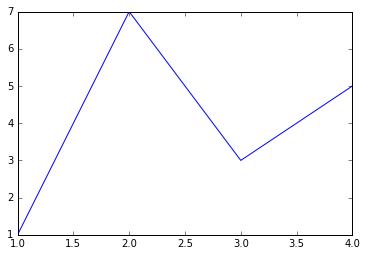

In [1]:
%matplotlib inline  
import pylab
pylab.figure(1) #create figure 1
pylab.plot([1,2,3,4], [1,7,3,5]) #draw on figure 1
pylab.show() #show figure on screen

In [ ]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.figure(1) #create figure 1
plt.plot([1,2,3,4], [1,7,3,5]) #draw on figure 1
plt.show() #show figure on screen

The bar at the top contains the name of the window, in this case “Figure 1.”

The middle section of the window contains the plot generated by the invocation of `pylab.plot`

The final line of code, `pylab.show()`, causes the window to appear on the computer screen.

The bar at the bottom of the window contains a number of push buttons.

It is possible to produce <b>multiple figures and to write them to files</b>.

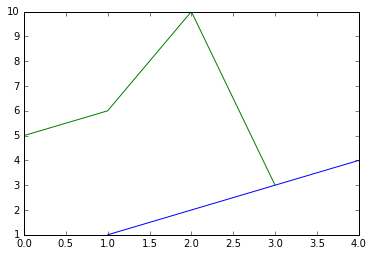

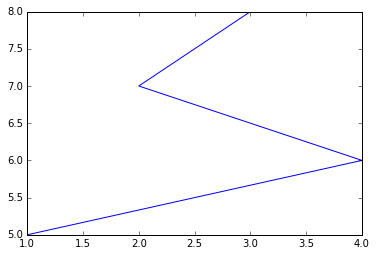

In [3]:
pylab.figure(1) #create figure 1
pylab.plot([1,2,3,4], [1,2,3,4]) #draw on figure 1
pylab.figure(2) #create figure 2
pylab.plot([1,4,2,3], [5,6,7,8]) #draw on figure 2
pylab.savefig('./output/Figure-Addie') #save figure 2

pylab.figure(1) #go back to working on figure 1
pylab.plot([5,6,10,3]) #draw again on figure 1
pylab.savefig('./output/Figure-Jane') #save figure 1

`pylab.plot([5,6,10,3]) #draw again on figure 1`

The corresponding x values default to

`range(len([5, 6, 10, 3]))`, 

which is why they range from 0 to 3 in this case.

PyLab has a notion of <b>“current figure.”</b> Executing `pylab.figure(x)` sets the current figure to the figure numbered x.

Let’s look at another example.

In [ ]:
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate
pylab.plot(values)

However, this cannot be easily inferred by looking only at the plot itself. That’s a bad thing. 
All plots should have <b>informative titles, and all axes should be labeled</b>.

In [ ]:
#If we add to the end of our the code the lines
pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')

For every plotted curve, there is an optional argument that is <b>a format string</b> indicating <b>the color and line type of theplot</b>

The default format string is 'b-', which produces a solid blue line.

To plot the above with red circles, one would replace the call `pylab.plot(values)` by

`pylab.plot(values, 'ro')`

In [ ]:
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate

pylab.plot(values,'b-')

pylab.plot(values,'ro')

#If we add to the end of our the code the lines
pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')

It’s also possible to change the <b>type size and line width</b> used in plots.

In [ ]:
#Page 145
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate
    
pylab.plot(values, linewidth = 10)

pylab.title('5% Growth, Compounded Annually',
            fontsize = 'xx-large')
pylab.xlabel('Years of Compounding', fontsize = 'x-small')
pylab.ylabel('Value of Principal ($)')

It is also possible to <b>change the default values</b>, which are known as “rc settings.”

These values are stored in a dictionary-like variable that can be accessed via the name  <b>pylab.rcParams</b>.

In [ ]:
#Page 146
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10

In [ ]:
principal = 10000 #initial investment
interestRate = 0.05
years = 20
values = []
for i in range(years + 1):
    values.append(principal)
    principal += principal*interestRate

pylab.plot(values,'b-')

pylab.plot(values,'ro')

#If we add to the end of our the code the lines
pylab.title('5% Growth, Compounded Annually')
pylab.xlabel('Years of Compounding')
pylab.ylabel('Value of Principal ($)')

If you are viewing plots on a color display, you will have little reason to customize these settings.

## 11.2 Plotting Mortgages, an Extended Example

In Chapter 8, we worked our way through a hierarchy of mortgages as way of illustrating the use of subclassing. We concluded that chapter by observing that 

#### “our program should be producing plots designed to show how the mortgage behaves over time.” 

Figure 11.1 enhances class Mortgage by adding methods that make it convenient to produce such plots.

In [ ]:
#Following function is defined in Chapter 8, and used here
def findPayment(loan, r, m):
    """Assumes: loan and r are floats, m an int
       Returns the monthly payment for a mortgage of size
       loan at a monthly rate of r for m months"""
    return loan*((r*(1+r)**m)/((1+r)**m - 1))

#Page 147, Figure 11.1
class Mortgage(object):
    """Abstract class for building different kinds of mortgages"""
    
    def __init__(self, loan, annRate, months):
        """Create a new mortgage"""
        self.loan = loan
        self.rate = annRate/12.0
        self.months = months
        self.paid = [0.0] 
        self.owed = [loan]
        self.payment = findPayment(loan, self.rate, months)
        self.legend = None #description of mortgage
        
    def makePayment(self):
        """Make a payment"""
        self.paid.append(self.payment)
        reduction = self.payment - self.owed[-1]*self.rate
        self.owed.append(self.owed[-1] - reduction)
        
    def getTotalPaid(self):
        """Return the total amount paid so far"""
        return sum(self.paid)
    
    def __str__(self):
        return self.legend

    def plotPayments(self, style):
        pylab.plot(self.paid[1:], style, label = self.legend)
    
    def plotBalance(self, style):
        pylab.plot(self.owed, style, label = self.legend)
        
    def plotTotPd(self, style):
        """Plot the cumulative total of the payments made"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        pylab.plot(totPd, style, label = self.legend)
    
    def plotNet(self, style):
        """Plot an approximation to the total cost of the mortgage
           over time by plotting the cash expended minus the equity
           acquired by paying off part of the loan"""
        totPd = [self.paid[0]]
        for i in range(1, len(self.paid)):
            totPd.append(totPd[-1] + self.paid[i])
        #Equity acquired through payments is amount of original loan
        #  paid to date, which is amount of loan minus what is still owed
        equityAcquired = pylab.array([self.loan]*len(self.owed))
        equityAcquired = equityAcquired - pylab.array(self.owed)
        net = pylab.array(totPd) - equityAcquired
        pylab.plot(net, style, label = self.legend)


The methods `plotPayments` and `plotBalance` are simple one-liners, but they do use a form of `pylab.plot` that we have not yet seen.

The nontrivial methods in class Mortgage are `plotTotPd` and `plotNet`. 

The method `plotTotPd` simply plots the cumulative total of the payments made. 

The method `plotNet` plots an approximation to the total cost of the mortgage over time by plotting the cash expended minus the equity acquired by paying off part of the loan

####  lists to array
The expression `pylab.array(self.owed)` in plotNet performs a type conversion 

Under the covers, `PyLab` has been converting these `lists` to a different type, `array`, which `PyLab` inherits from `NumPy`.

There are a number of convenient ways to manipulate arrays that are not readily available for lists.

In [ ]:
#Page 148
a1 = pylab.array([1, 2, 4]) # create a list, and then convert it to array.
print('a1 =', a1)
a2 = a1*2
print('a2 =', a2)
print('a1 + 3 =', a1 + 3)
print('3 - a1 =', 3 - a1)
print('a1 - a2 =', a1 - a2)
print('a1*a2 =', a1*a2)

There are a number of ways to create `arrays` in `PyLab`, but the most common way is:
    
    first create a list, and then convert it.

Figure 11.2 repeats the three subclasses of Mortgage from Chapter 8.

In [ ]:
#Page 149, Figure 11.2
class Fixed(Mortgage):
    def __init__(self, loan, r, months):
        Mortgage.__init__(self, loan, r, months)
        self.legend = 'Fixed, ' + str(r*100) + '%' 

class FixedWithPts(Mortgage):
    def __init__(self, loan, r, months, pts):
        Mortgage.__init__(self, loan, r, months)
        self.pts = pts
        self.paid = [loan*(pts/100.0)]
        self.legend = 'Fixed, ' + str(r*100) + '%, '\
                   + str(pts) + ' points'

class TwoRate(Mortgage):
    def __init__(self, loan, r, months, teaserRate, teaserMonths):
        Mortgage.__init__(self, loan, teaserRate, months)
        self.teaserMonths = teaserMonths
        self.teaserRate = teaserRate
        self.nextRate = r/12.0
        self.legend = str(teaserRate*100)\
                      + '% for ' + str(self.teaserMonths)\
                      + ' months, then ' + str(r*100) + '%'

    def makePayment(self):
        if len(self.paid) == self.teaserMonths + 1:
            self.rate = self.nextRate
            self.payment = findPayment(self.owed[-1], self.rate,
                                       self.months - self.teaserMonths)
        Mortgage.makePayment(self)


Figure 11.3 contain functions that can be used to generate plots intended to provide insight about the different kinds of mortgages.

In [ ]:
#Page 150, Figure 11.3
def plotMortgages(morts, amt):
    styles = ['b-', 'b-.', 'b:']
   
    #Give names to figure numbers
    payments = 0
    cost = 1
    balance = 2
    netCost = 3
    # titles and axis labels for each plot 
    pylab.figure(payments)
    pylab.title('Monthly Payments of Different $' + str(amt)
                + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Monthly Payments')
    pylab.figure(cost)
    pylab.title('Cash Outlay of Different $' + str(amt) + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Total Payments')
    pylab.figure(balance)
    pylab.title('Balance Remaining of $' + str(amt) + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Remaining Loan Balance of $')
    pylab.figure(netCost)
    pylab.title('Net Cost of $' + str(amt) + ' Mortgages')
    pylab.xlabel('Months')
    pylab.ylabel('Payments - Equity $')
    
    # produce the actual pl
    for i in range(len(morts)):
        pylab.figure(payments)
        morts[i].plotPayments(styles[i])
        pylab.figure(cost)
        morts[i].plotTotPd(styles[i])
        pylab.figure(balance)
        morts[i].plotBalance(styles[i])
        pylab.figure(netCost)
        morts[i].plotNet(styles[i])
   
    # legend
    pylab.figure(payments)
    pylab.legend(loc = 'upper center')
    
    pylab.figure(cost)
    pylab.legend(loc = 'best')
    
    pylab.figure(balance)
    pylab.legend(loc = 'best') 

def compareMortgages(amt, years, fixedRate, pts, ptsRate,
                    varRate1, varRate2, varMonths):
    totMonths = years*12
    fixed1 = Fixed(amt, fixedRate, totMonths)
    fixed2 = FixedWithPts(amt, ptsRate, totMonths, pts)
    twoRate = TwoRate(amt, varRate2, totMonths, varRate1, varMonths)
    morts = [fixed1, fixed2, twoRate]
    for m in range(totMonths):
        for mort in morts:
            mort.makePayment()
    
    
    plotMortgages(morts, amt)

In [ ]:
#Page 150
compareMortgages(amt=200000, years=30, fixedRate=0.07,
                 pts = 3.25, ptsRate=0.05,
                 varRate1=0.045, varRate2=0.095, varMonths=48)

The function plotMortgages generates appropriate <b>titles and axis labels</b> for each plot, and then uses the methods in MortgagePlots to <b>produce the actual plots</b>.

1 `plotPayments` : the first plot makes it clear <b>how the monthly payments vary (or don’t) over time</b>

2 `plotTotPd` : It sheds some light on the cost of each kind of mortgage by plotting the <b>cumulative costs</b> that have been incurred at the start of each month.

3 `plotBlance`: show the remaining debt

4 `plotNet`: total net cost of having the mortgage
